<a href="https://colab.research.google.com/github/karaogluhh/deeplearning-models/blob/master/pytorch_ipynb/mlp/mlp-basic-hhk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps
1. Import relevant packages
2. Download and prepare dataset of interest
3. Prepare dataloaders
4. Build a model and instantiate it
5. Set learning parameters such as learning rate, number of epochs, batch size and so on
6. Do the train and validation loops
7. Do the evaluation loop
8. Visualize the results
9. Save the model checkpoints and the results

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms
import numpy as np
from matplotlib import pyplot as plt



In [4]:
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.6.0+cu124


In [5]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 11.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 343kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.42MB/s]


In [21]:
print(f"Training dataset size: {len(train_dataset.train_data)}")
print(f"Training dataset size: {len(train_dataset.test_data)}")
print(f"Training dataset size: {len(train_dataset.train_labels)}") # Weird
print(f"Training dataset size: {len(train_dataset.test_labels)}")  # Weird

Training dataset size: 60000
Training dataset size: 60000
Training dataset size: 60000
Training dataset size: 60000


/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


The first ten labels are tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])


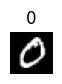

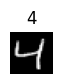

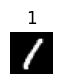

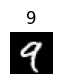

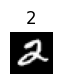

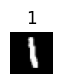

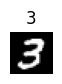

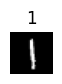

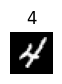

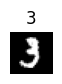

In [23]:
print(f"The first ten labels are {train_dataset.train_labels[:10]}")

for i in range(1,11):
  plt.subplot(1, 10, i)
  plt.imshow(train_dataset.train_data[i].squeeze(), cmap='gray')
  plt.title(train_dataset.train_labels[i].item())
  plt.axis('off')
  plt.show()

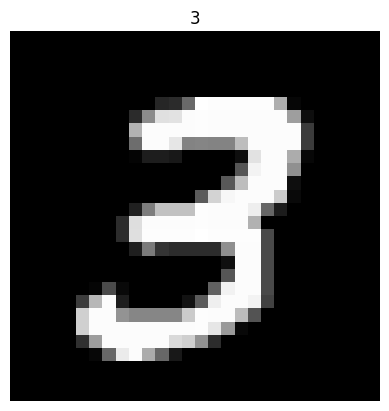

In [27]:
img, label = train_dataset[7]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(label)
plt.axis('off')
plt.show()

In [61]:
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])


In [67]:

linear_layer = torch.nn.Linear(in_features=2, out_features=3, bias=True)
print("---------------------------------------------------------------------------")
print("[INFO] Randomly initialized weights and biases of a simple linear layer ...")
print("---------------------------------------------------------------------------")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.weight}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.weight.data}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.weight.grad}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.bias}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.bias.data}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.bias.grad}")
print("[INFO] End of the story ...")
print("---------------------------------------------------------------------------\n\n\n")



linear_layer.weight.data = torch.tensor([[1., 2.], [3., 4.], [5., 6.]])
linear_layer.bias.data = torch.tensor([0.1, 0.2, 0.3])
print("---------------------------------------------------------------------------")
print("[INFO] Manually initialized weights and biases of a simple linear layer ...")
print("---------------------------------------------------------------------------")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.weight}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.weight.data}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.weight.grad}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.bias}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.bias.data}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.bias.grad}")
print("[INFO] End of the story ...")
print("---------------------------------------------------------------------------\n\n\n")

w = torch.empty(3, 5)
b = torch.empty(3, )

linear_layer.weight.data = torch.nn.init.normal_(w, mean=0., std=1.)
linear_layer.bias.data = torch.nn.init.zeros_(b)
print("---------------------------------------------------------------------------")
print("[INFO] Manually initialized weights and biases of a simple linear layer ...")
print("---------------------------------------------------------------------------")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.weight}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.weight.data}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.weight.grad}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.bias}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.bias.data}")
print(f"A linear layer's randomly initialized parameters: \n {linear_layer.bias.grad}")
print("[INFO] End of the story ...")
print("---------------------------------------------------------------------------\n\n\n")

# detach() usage

a = torch.tensor([2., 3., -6], requires_grad=True)
print(a)

b = a.detach()
print(b)

c = b.requires_grad_(True)
print(c)

---------------------------------------------------------------------------
[INFO] Randomly initialized weights and biases of a simple linear layer ...
---------------------------------------------------------------------------
A linear layer's randomly initialized parameters: 
 Parameter containing:
tensor([[-0.1284,  0.2787],
        [-0.5078, -0.1005],
        [ 0.4973,  0.5711]], requires_grad=True)
A linear layer's randomly initialized parameters: 
 tensor([[-0.1284,  0.2787],
        [-0.5078, -0.1005],
        [ 0.4973,  0.5711]])
A linear layer's randomly initialized parameters: 
 None
A linear layer's randomly initialized parameters: 
 Parameter containing:
tensor([-0.0611,  0.2451,  0.3309], requires_grad=True)
A linear layer's randomly initialized parameters: 
 tensor([-0.0611,  0.2451,  0.3309])
A linear layer's randomly initialized parameters: 
 None
[INFO] End of the story ...
---------------------------------------------------------------------------



-----------------

In [30]:
# Model Building
class MLPv0(nn.Module):
  def __init__(self):
    super(MLPv0, self).__init__()

    self.fc1 = nn.Linear(28 * 28, 128)
    self.fc2 = nn.Linear(128, 256)
    self.fc3 = nn.Linear(256, 10)

  def forward(self, x):
    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model = MLPv0()


# torch.Tensor.normal_
# torch.Tensor.zero_
# torch.nn.init.ones_(tensor)
# torch.nn.init.zeros_(tensor)

In [31]:
# Hyperparameters
random_seed = 1
learning_rate = 0.1
num_epochs = 10
batch_size = 64

# Device
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [37]:
tensor = torch.tensor([1., 2., 3., 4., 5.])
print(tensor)

print(tensor.normal_(mean=0, std=1))
print(tensor)

print(tensor.zero_())
print(tensor)

tensor([1., 2., 3., 4., 5.])
tensor([-1.4212, -0.1070,  1.1470, -0.9353, -0.3403])
tensor([-1.4212, -0.1070,  1.1470, -0.9353, -0.3403])
tensor([0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0.])


In [38]:
w = torch.empty(3, 5)
nn.init.normal_(w)

tensor([[-0.0455, -0.6086, -1.3895, -0.2519,  1.2342],
        [ 0.7726, -1.8831,  0.7808,  0.3199, -0.9644],
        [ 2.1321, -0.6509,  0.8118, -1.3384, -0.2690]])